### Q1. What is the mathematical formula for a linear SVM?
Ans: \

A **Support Vector Machine (SVM)** is a supervised learning algorithm used for classification tasks. The goal of a **linear SVM** is to find a hyperplane that best separates the data points of different classes.

### **Mathematical Formula for a Linear SVM:**

Consider a binary classification problem where we have two classes, **+1** and **-1**, and the training data consists of **n** data points:

$[
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
$]
where:
- $( x_i \in \mathbb{R}^d $) (feature vector of the \(i\)-th data point),
- $( y_i \in \{-1, +1\} $) (class label of the \(i\)-th data point),
- $( d \) is the number of features.

#### **Goal:**
The goal of linear SVM is to find a hyperplane $( \mathbf{w} \cdot \mathbf{x} + b = 0 $) that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the closest data points from either class (called **support vectors**).

#### **Linear Decision Boundary:**
The decision boundary is represented by the equation:
$[
\mathbf{w} \cdot \mathbf{x} + b = 0
$]
where:
- $( \mathbf{w} $) is the weight vector (normal to the hyperplane),
- $( b ) is the bias term (offset from the origin),
- $( \mathbf{x} $) is the input feature vector.

#### **Margins:**
The **margin** is the distance between the decision boundary and the closest data points from either class. For a data point $( x_i )$, the margin is defined as:

$[
\frac{1}{\|\mathbf{w}\|}
$]

To maximize the margin, the SVM optimization problem becomes:

$[
\underset{\mathbf{w}, b}{\text{maximize}} \, \frac{1}{2} \|\mathbf{w}\|^2
$]

This is equivalent to minimizing $( \frac{1}{2} \|\mathbf{w}\|^2 )$.

#### **Constraints:**
For the SVM to correctly classify the data points, the following constraints must hold for all training data points:

$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, n
$]

This ensures that all data points are correctly classified with a margin of at least 1 from the hyperplane.

#### **Optimization Problem:**
The optimization problem becomes:
$[
\min_{\mathbf{w}, b} \, \frac{1}{2} \|\mathbf{w}\|^2
$]
subject to:
$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, \dots, n
$]

This can be solved using quadratic programming to find the optimal $( \mathbf{w} $) and \( b \).

#### **Final Decision Function:**
Once the optimal hyperplane is found, the decision rule for classifying a new data point $( \mathbf{x} $) is:

$[
\text{Predict}(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)
$]

- If $( \mathbf{w} \cdot \mathbf{x} + b > 0 )$, the predicted class is \( +1 \),
- If $( \mathbf{w} \cdot \mathbf{x} + b < 0 )$, the predicted class is \( -1 \).

### **Summary:**
In a linear SVM, the optimization problem aims to find the weight vector $( \mathbf{w} $) and bias \( b \) that define a hyperplane to separate the data points with the largest margin while ensuring that all points are correctly classified. The decision function then classifies new points based on which side of the hyperplane they lie on.

### Q2. What is the objective function of a linear SVM?
Ans: \

The **objective function** of a **linear SVM** depends on whether you're dealing with the **hard-margin SVM** (no tolerance for misclassification) or the **soft-margin SVM** (allows some misclassification for non-linearly separable data).

---

###  **1. Hard-Margin SVM (for linearly separable data)**

#### **Objective Function:**
$$[
\min_{\mathbf{w}, b} \ \frac{1}{2} \|\mathbf{w}\|^2
]$$

#### **Subject to the constraint:**
$$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i = 1, 2, ..., n
]$$

- $( \mathbf{w} $): weight vector
- \( b \): bias term
- $( \mathbf{x}_i $): input vector
- $( y_i \in \{-1, +1\} $): class label
- $( \|\mathbf{w}\| $): norm of the weight vector (related to the margin)

> **Goal**: Maximize the margin between the two classes by minimizing \( \|\mathbf{w}\|^2 \), while ensuring all points are correctly classified.

---

###  **2. Soft-Margin SVM (for non-linearly separable data)**

When perfect separation is not possible, **slack variables** $( \xi_i )$ are introduced to allow some violations.

#### **Objective Function:**
$$[
\min_{\mathbf{w}, b, \xi} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
]$$

#### **Subject to the constraints:**
$$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
]$$

- $( \xi_i )$: slack variables (penalties for misclassification or margin violations)
- \( C \): regularization parameter that balances the trade-off between maximizing the margin and minimizing the classification error.

> **Interpretation of \(C\)**:
- High \(C\) → Model penalizes misclassifications more heavily (less tolerant to errors)
- Low \(C\) → Model allows more misclassifications to find a wider margin

---

###  **Summary:**

- The **objective function** of a **linear SVM** aims to:
  - **Minimize** the model complexity (via $( \|\mathbf{w}\|^2 )$)
  - **Maximize** the margin between classes
  - Optionally **penalize misclassifications** (using slack variables and regularization)

 **Soft-margin objective (most commonly used):**
$$[
\boxed{\min_{\mathbf{w}, b, \xi} \ \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i}
]$$  
subject to:
$$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
]$$

### Q3. What is the kernel trick in SVM?
Ans: \

The **kernel trick** is a powerful technique used in Support Vector Machines (SVMs) to handle **non-linearly separable data** by implicitly mapping it into a higher-dimensional space — without actually performing the transformation.

---

###  Why do we need the kernel trick?

In some datasets, the classes can't be separated by a straight line (or hyperplane in higher dimensions). For example:

- In 2D, a circular pattern of data points can’t be separated linearly.
- But in a **higher-dimensional space**, these points might become linearly separable.

The problem is: explicitly computing this transformation (called **feature mapping**) can be **very expensive** or **infinite-dimensional**.

---

###  What the kernel trick does:

Instead of computing the transformation $(\phi(x)$) and then taking dot products in high dimensions, **the kernel trick** allows us to **compute the dot product directly in the high-dimensional space** using a **kernel function** $(K(x_i, x_j)$):

$[
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$]

This avoids explicitly computing the transformation $(\phi(x)$), saving time and memory.

---

### $ Common Kernel Functions:

1. **Linear Kernel** (used for linearly separable data):
   $[
   K(x_i, x_j) = x_i^T x_j
   $]

2. **Polynomial Kernel**:
   $[
   K(x_i, x_j) = (\gamma x_i^T x_j + r)^d
   $]
   - $( \gamma $): scale, \( r \): offset, \( d \): degree of polynomial

3. **Radial Basis Function (RBF) or Gaussian Kernel**:
   $[
   K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
   $]
   - Very popular for non-linear problems

4. **Sigmoid Kernel**:
   $[
   K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)
   $]

---

###  Example Intuition:

Imagine a dataset shaped like a donut (inner class and outer class). In 2D, no straight line can separate the two. But if we map it to 3D (e.g., using a radial transformation), a hyperplane *can* separate them.

The **RBF kernel** does this kind of mapping **implicitly**.

### Q4. What is the role of support vectors in SVM Explain with example
Ans:

**Support Vectors** are the **data points that lie closest to the decision boundary (hyperplane)** in a Support Vector Machine (SVM). These points are **critical** because:

- They **define** the position and orientation of the separating hyperplane.
- The **margin** (i.e., the distance between the hyperplane and the nearest data points) is calculated **based on these support vectors**.
- If you **remove** a support vector, the hyperplane would **change**.
- All other data points (farther from the hyperplane) do **not affect** the decision boundary.

---

###  **Mathematical Role:**

The decision boundary of a linear SVM is:
$$[
f(x) = \mathbf{w} \cdot \mathbf{x} + b = 0
]$$

The support vectors satisfy:
$$[
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) = 1
]$$

Where:
- $( y_i \in \{-1, +1\} $)
- $( \mathbf{x}_i $): support vector
- $( \mathbf{w} $): weight vector
- \( b \): bias term

These points lie **exactly on the margin** (the boundary of the margin area).

---

###  **Why are they important?**

- SVM aims to **maximize the margin**, and this margin is **defined only by the support vectors**.
- The **model complexity** and **generalization ability** depend primarily on the support vectors.
- Even if the dataset is huge, SVM only needs to keep the **support vectors** for prediction, making it memory-efficient.

---

###  **Example:**

Imagine you have the following 2D binary classification data:

| x1 | x2 | Label |
|----|----|-------|
| 2  | 3  | +1    |
| 3  | 3  | +1    |
| 2  | 2  | -1    |
| 3  | 1  | -1    |

When you fit a linear SVM:

- The SVM finds the best line that separates the +1 and -1 classes **with the widest possible margin**.
- Let’s say the points **(2,3)** and **(3,1)** are closest to this line.
- These two points are **support vectors**.
- All other points don’t matter for defining the margin.

In [1]:
"""
Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use first two features for visualization
y = iris.target

# Binary classification (e.g., class 0 vs. others)
y = (y == 0).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (sklearn): {acc:.2f}")


Accuracy (sklearn): 1.00


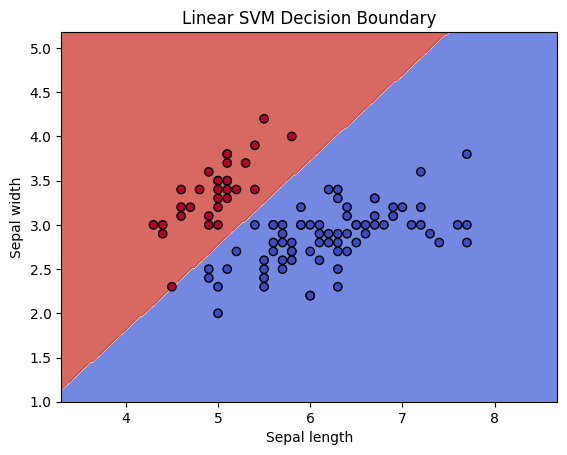

In [2]:
def plot_decision_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_decision_boundary(clf, X_train, y_train)


In [3]:
for C in [0.01, 0.1, 1, 10, 100]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={C}, Accuracy={acc:.2f}")


C=0.01, Accuracy=0.58
C=0.1, Accuracy=1.00
C=1, Accuracy=1.00
C=10, Accuracy=1.00
C=100, Accuracy=1.00


In [4]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, 0)


In [5]:
model = LinearSVM()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy (scratch): {accuracy_score(y_test, y_pred):.2f}")


Accuracy (scratch): 1.00
